# First steps with Elasticsearch and Python

![Image of ES](https://www.elastic.co/static/images/elastic-logo-200.png)
![Image of Python](http://www.science-emergence.com/media/images/68.png)

In [ ]:
#this supposes that you have Elasticsearch (5+ and python 2.7)

In [221]:
import requests
from elasticsearch import Elasticsearch
import json
import matplotlib.pyplot as plt

In [ ]:
#Check that elasticsearch is up and running

In [222]:
res = requests.get('http://localhost:9200')
print(res.content)

{
  "name" : "i-2B-rU",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "dE7lP_FQSFqWfqzdFnZigQ",
  "version" : {
    "number" : "5.1.1",
    "build_hash" : "5395e21",
    "build_date" : "2016-12-06T12:36:15.409Z",
    "build_snapshot" : false,
    "lucene_version" : "6.3.0"
  },
  "tagline" : "You Know, for Search"
}



In [223]:
es = Elasticsearch([{'host': 'localhost', 'port': 9200}])
print( es.count())

In [225]:
# let's create an index called starwars
# Let's name the document type is "people"
# Let's add 1 element :(Luke)

In [226]:
try:
    es.indices.delete(index='starwars')
except:
    print "the index was already deleted"

In [227]:

es.index(index='starwars', doc_type='people', id=1, body={
	"name": "Luke Skywalker",
	"height": "172",
	"mass": "77",
	"hair_color": "blond",
	"birth_year": "19BBY",
	"gender": "male",
})

{u'_id': u'1',
 u'_index': u'starwars',
 u'_shards': {u'failed': 0, u'successful': 1, u'total': 2},
 u'_type': u'people',
 u'_version': 1,
 u'created': True,
 u'result': u'created'}

In [228]:
#let's use the API : http://swapi.co/api/people/<integer>/
# to retrieve data about the characters of starwars
# there is a limited number of  characters registered
# we will then, use a while loop while the rest message = 200

In [229]:
def  populate_es(number_max_of_characters):
    
    # we listen to the request status code on port 9200 - where the node is set up
    r = requests.get('http://localhost:9200') 
    print(r.content)
    
    i=1
    number_max_of_characters= min(number_max_of_characters,101)
    while i <number_max_of_characters:

        # we follow the syntax explained above
        r = requests.get('http://swapi.co/api/people/'+ str(i))
        # print r.content
        # print r.status_code
        # if the request status code is 200 ( = OK)
        if (r.status_code == 200):
            # we add the document with the id=i , as a "people document", at the index called "starwars"
            es.index(index='starwars', doc_type='people', id=i, body=json.loads(r.content))
        i=i+1


In [380]:
# Let's say we want to find 100 characters - if they exist thanks to this API

In [381]:
populate_es(100)

{
  "name" : "i-2B-rU",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "dE7lP_FQSFqWfqzdFnZigQ",
  "version" : {
    "number" : "5.1.1",
    "build_hash" : "5395e21",
    "build_date" : "2016-12-06T12:36:15.409Z",
    "build_snapshot" : false,
    "lucene_version" : "6.3.0"
  },
  "tagline" : "You Know, for Search"
}



In [382]:
# Let's check whether there is an individual with id 70

In [231]:
es.get(index='starwars', doc_type='people', id=70)['_source']

{u'birth_year': u'unknown',
 u'created': u'2014-12-20T16:57:44.471000Z',
 u'edited': u'2014-12-20T21:17:50.468000Z',
 u'eye_color': u'yellow',
 u'films': [u'http://swapi.co/api/films/5/'],
 u'gender': u'female',
 u'hair_color': u'blonde',
 u'height': u'168',
 u'homeworld': u'http://swapi.co/api/planets/54/',
 u'mass': u'55',
 u'name': u'Zam Wesell',
 u'skin_color': u'fair, green, yellow',
 u'species': [u'http://swapi.co/api/species/30/'],
 u'starships': [],
 u'url': u'http://swapi.co/api/people/70/',
 u'vehicles': [u'http://swapi.co/api/vehicles/45/']}

In [383]:
# Let's find characters whose name starts with lu
es.search(index="starwars", body={"query": {"prefix" : { "name" : "lu" }}})

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5},
 u'hits': {u'hits': [{u'_id': u'1',
    u'_index': u'starwars',
    u'_score': 1.0,
    u'_source': {u'birth_year': u'19BBY',
     u'created': u'2014-12-09T13:50:51.644000Z',
     u'edited': u'2014-12-20T21:17:56.891000Z',
     u'eye_color': u'blue',
     u'films': [u'http://swapi.co/api/films/2/',
      u'http://swapi.co/api/films/6/',
      u'http://swapi.co/api/films/3/',
      u'http://swapi.co/api/films/1/',
      u'http://swapi.co/api/films/7/'],
     u'gender': u'male',
     u'hair_color': u'blond',
     u'height': u'172',
     u'homeworld': u'http://swapi.co/api/planets/1/',
     u'mass': u'77',
     u'name': u'Luke Skywalker',
     u'skin_color': u'fair',
     u'species': [u'http://swapi.co/api/species/1/'],
     u'starships': [u'http://swapi.co/api/starships/12/',
      u'http://swapi.co/api/starships/22/'],
     u'url': u'http://swapi.co/api/people/1/',
     u'vehicles': [u'http://swapi.co/api/vehicles/14/',
      u

In [384]:
# Let's find characters whose name starts with da
es.search(index="starwars", body={"query": {"prefix" : { "name" : "le" }}})

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5},
 u'hits': {u'hits': [{u'_id': u'5',
    u'_index': u'starwars',
    u'_score': 1.0,
    u'_source': {u'birth_year': u'19BBY',
     u'created': u'2014-12-10T15:20:09.791000Z',
     u'edited': u'2014-12-20T21:17:50.315000Z',
     u'eye_color': u'brown',
     u'films': [u'http://swapi.co/api/films/2/',
      u'http://swapi.co/api/films/6/',
      u'http://swapi.co/api/films/3/',
      u'http://swapi.co/api/films/1/',
      u'http://swapi.co/api/films/7/'],
     u'gender': u'female',
     u'hair_color': u'brown',
     u'height': u'150',
     u'homeworld': u'http://swapi.co/api/planets/2/',
     u'mass': u'49',
     u'name': u'Leia Organa',
     u'skin_color': u'light',
     u'species': [u'http://swapi.co/api/species/1/'],
     u'starships': [],
     u'url': u'http://swapi.co/api/people/5/',
     u'vehicles': [u'http://swapi.co/api/vehicles/30/']},
    u'_type': u'people'},
   {u'_id': u'63',
    u'_index': u'starwars',
    u'_scor

In [234]:
es.search(index="starwars", 
          body={
    "query": {
        "match": {
            "name": "Darth Vader"
        }
    }
    })

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5},
 u'hits': {u'hits': [{u'_id': u'4',
    u'_index': u'starwars',
    u'_score': 4.082477,
    u'_source': {u'birth_year': u'41.9BBY',
     u'created': u'2014-12-10T15:18:20.704000Z',
     u'edited': u'2014-12-20T21:17:50.313000Z',
     u'eye_color': u'yellow',
     u'films': [u'http://swapi.co/api/films/2/',
      u'http://swapi.co/api/films/6/',
      u'http://swapi.co/api/films/3/',
      u'http://swapi.co/api/films/1/'],
     u'gender': u'male',
     u'hair_color': u'none',
     u'height': u'202',
     u'homeworld': u'http://swapi.co/api/planets/1/',
     u'mass': u'136',
     u'name': u'Darth Vader',
     u'skin_color': u'white',
     u'species': [u'http://swapi.co/api/species/1/'],
     u'starships': [u'http://swapi.co/api/starships/13/'],
     u'url': u'http://swapi.co/api/people/4/',
     u'vehicles': []},
    u'_type': u'people'},
   {u'_id': u'44',
    u'_index': u'starwars',
    u'_score': 2.0412385,
    u'_source': {

In [235]:

res_list=es.search(index="starwars", 
          body={
    "query": {
        "match": {
            "gender": "female"
        }
    }
    })['hits']['hits']

In [236]:
[el['_source']['name'] for el in res_list]

[u'Taun We',
 u'Jocasta Nu',
 u'R4-P17',
 u'Luminara Unduli',
 u'Cord\xe9',
 u'Padm\xe9 Amidala',
 u'Shmi Skywalker',
 u'Adi Gallia',
 u'Rey',
 u'Dorm\xe9']

In [237]:
es.search(index="starwars", 
          body={
    "query": {
        "query_string": {
            "query": "Luke Skywalker"
        }
    }
})

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5},
 u'hits': {u'hits': [{u'_id': u'1',
    u'_index': u'starwars',
    u'_score': 3.7333677,
    u'_source': {u'birth_year': u'19BBY',
     u'created': u'2014-12-09T13:50:51.644000Z',
     u'edited': u'2014-12-20T21:17:56.891000Z',
     u'eye_color': u'blue',
     u'films': [u'http://swapi.co/api/films/2/',
      u'http://swapi.co/api/films/6/',
      u'http://swapi.co/api/films/3/',
      u'http://swapi.co/api/films/1/',
      u'http://swapi.co/api/films/7/'],
     u'gender': u'male',
     u'hair_color': u'blond',
     u'height': u'172',
     u'homeworld': u'http://swapi.co/api/planets/1/',
     u'mass': u'77',
     u'name': u'Luke Skywalker',
     u'skin_color': u'fair',
     u'species': [u'http://swapi.co/api/species/1/'],
     u'starships': [u'http://swapi.co/api/starships/12/',
      u'http://swapi.co/api/starships/22/'],
     u'url': u'http://swapi.co/api/people/1/',
     u'vehicles': [u'http://swapi.co/api/vehicles/14/',
 

In [238]:
es.search(index="starwars", 
          body={
    "query": {
        "term": {
            "name": "luke"
        }
    }
})

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5},
 u'hits': {u'hits': [{u'_id': u'1',
    u'_index': u'starwars',
    u'_score': 2.1120872,
    u'_source': {u'birth_year': u'19BBY',
     u'created': u'2014-12-09T13:50:51.644000Z',
     u'edited': u'2014-12-20T21:17:56.891000Z',
     u'eye_color': u'blue',
     u'films': [u'http://swapi.co/api/films/2/',
      u'http://swapi.co/api/films/6/',
      u'http://swapi.co/api/films/3/',
      u'http://swapi.co/api/films/1/',
      u'http://swapi.co/api/films/7/'],
     u'gender': u'male',
     u'hair_color': u'blond',
     u'height': u'172',
     u'homeworld': u'http://swapi.co/api/planets/1/',
     u'mass': u'77',
     u'name': u'Luke Skywalker',
     u'skin_color': u'fair',
     u'species': [u'http://swapi.co/api/species/1/'],
     u'starships': [u'http://swapi.co/api/starships/12/',
      u'http://swapi.co/api/starships/22/'],
     u'url': u'http://swapi.co/api/people/1/',
     u'vehicles': [u'http://swapi.co/api/vehicles/14/',
 

In [239]:
es.search(index="starwars", 
          body={
    "query": {
        "constant_score": {
            "filter": {
                "term": {
                    # note that value should be *lower-cased*
                    'gender':'female'
                }
            }
        }
    }
})

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5},
 u'hits': {u'hits': [{u'_id': u'73',
    u'_index': u'starwars',
    u'_score': 1.0,
    u'_source': {u'birth_year': u'unknown',
     u'created': u'2014-12-20T17:31:21.195000Z',
     u'edited': u'2014-12-20T21:17:50.474000Z',
     u'eye_color': u'black',
     u'films': [u'http://swapi.co/api/films/5/'],
     u'gender': u'female',
     u'hair_color': u'none',
     u'height': u'213',
     u'homeworld': u'http://swapi.co/api/planets/10/',
     u'mass': u'unknown',
     u'name': u'Taun We',
     u'skin_color': u'grey',
     u'species': [u'http://swapi.co/api/species/32/'],
     u'starships': [],
     u'url': u'http://swapi.co/api/people/73/',
     u'vehicles': []},
    u'_type': u'people'},
   {u'_id': u'5',
    u'_index': u'starwars',
    u'_score': 1.0,
    u'_source': {u'birth_year': u'19BBY',
     u'created': u'2014-12-10T15:20:09.791000Z',
     u'edited': u'2014-12-20T21:17:50.315000Z',
     u'eye_color': u'brown',
     u'fil

In [240]:
# if not specified elasticsearch will only return 
# 10 entries
# we have to specify  the "from" and "size" to get custom number of results 

In [344]:
def get_the_x_first_results(n_max=100):
    hit_list=es.search(index="starwars", 
              body={ 
                "from":0, "size":100,
                "query": {
                "match_all": {}
                }
              }
    )['hits']['hits']
    return(hit_list)

In [345]:
get_the_x_first_results()

[{u'_id': u'25',
  u'_index': u'starwars',
  u'_score': 1.0,
  u'_source': {u'birth_year': u'31BBY',
   u'created': u'2014-12-15T12:56:32.683000Z',
   u'edited': u'2014-12-20T21:17:50.357000Z',
   u'eye_color': u'brown',
   u'films': [u'http://swapi.co/api/films/2/',
    u'http://swapi.co/api/films/3/'],
   u'gender': u'male',
   u'hair_color': u'black',
   u'height': u'177',
   u'homeworld': u'http://swapi.co/api/planets/30/',
   u'mass': u'79',
   u'name': u'Lando Calrissian',
   u'skin_color': u'dark',
   u'species': [u'http://swapi.co/api/species/1/'],
   u'starships': [u'http://swapi.co/api/starships/10/'],
   u'url': u'http://swapi.co/api/people/25/',
   u'vehicles': []},
  u'_type': u'people'},
 {u'_id': u'26',
  u'_index': u'starwars',
  u'_score': 1.0,
  u'_source': {u'birth_year': u'37BBY',
   u'created': u'2014-12-15T13:01:57.178000Z',
   u'edited': u'2014-12-20T21:17:50.359000Z',
   u'eye_color': u'blue',
   u'films': [u'http://swapi.co/api/films/2/'],
   u'gender': u'male'

In [243]:
# Let's find the id list of all the character

In [244]:
f_list=sorted([int(el['_source']['height']) for el in get_the_x_first_results() 
               if el['_source']['height'].lower()==(el['_source']['height']).upper()])

In [ ]:
#Does size matter ?

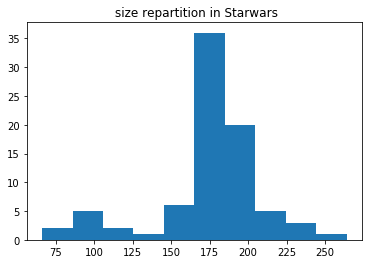

In [247]:
plt.hist(f_list)
plt.title("size repartition in Starwars")
plt.show()

In [ ]:
# we want to find names which are alphabetically located between name1 and name2

In [271]:
def get_the_names_between_two_names(name_start='laila',name_end='luke'):
    
    # we must handle the case when the user don't respect the order for the names
    if name_end < name_start:
        c=name_end
        name_end=name_start
        name_start=c

    hit_list=es.search(index="starwars", 
                       body={
                           "query":{
                              "constant_score": {
                                  "filter": {
                                        "range": {
                                            "name": {
                                                "from": name_start,
                                                "to": name_end
                                            }
                                        }
                                    }
                                }
                            }
                       }
                      )['hits']['hits']

    names_hit_list=[el['_source']['name'] for el in hit_list]
    return(names_hit_list)

In [ ]:
#Let's fire the function to find the names of characters whose name is between "luke" and "laila"

In [279]:
get_the_names_between_two_names('luke','laila')

[u'Lando Calrissian',
 u'Lobot',
 u'Leia Organa',
 u'Cliegg Lars',
 u'Owen Lars',
 u'Luke Skywalker',
 u'Beru Whitesun lars',
 u'Lama Su',
 u'Poggle the Lesser']

In [ ]:
#fuzzy match allows to match words that are distantly connected (hence fuzziness)

In [403]:
def fuzzy_match_names(a_name_to_match="luke"):
    hit_list=es.search(index="starwars", 
                           body={
                               "from":0,
                               "size":100,
                               "query":{"fuzzy":{
                                               "name":{
                                                     "value":a_name_to_match,
                                                     "boost" : 1.0,
                                                     "fuzziness" :     20,
                                                     "prefix_length" : 0,
                                                     "max_expansions": 100}
                                               }
                                       }
                           }
             )['hits']['hits']
    names_hit_list=[el['_source']['name'] for el in hit_list]
    return(names_hit_list)

In [404]:
fuzzy_match_names("laila")

[u'Leia Organa', u'Ayla Secura', u'Lama Su', u'Bail Prestor Organa']

In [ ]:
# let's use a boolean query
# which has a must clause list 
# a filter clause

In [368]:
def get_the_given_color_male_characters(color_type="fair"):

    hit_list=es.search(index="starwars", 
                       body={
                           "from":0,
                           "size":100,
                           "query":{
                               "bool":{
                                        "must":
                                           [
                                            {"term": {"gender": "male"}}
                                            ],

                                       "filter": {
                                                "term": {
                                                    "skin_color": "fair"
                                                }
                                        }

                                }
                           }
                       }
                      )['hits']['hits']
    
    names_hit_list=[el['_source']['name'] for el in hit_list]
    sc_hit_list=[el['_source']['skin_color'] for el in hit_list]
    for i in range(len(names_hit_list)):
        print( "{0} -> {1}".format(names_hit_list[i].encode('utf8'),sc_hit_list[i].encode('utf8')))


In [369]:
#Let's find the characters with a fair skin -by default, or any other type as parameter

In [370]:
get_the_given_color_male_characters()

Obi-Wan Kenobi -> fair
Wilhuff Tarkin -> fair
Qui-Gon Jinn -> fair
Finis Valorum -> fair
Cliegg Lars -> fair
Luke Skywalker -> fair
Dooku -> fair
Wedge Antilles -> fair
Ric Olié -> fair
Anakin Skywalker -> fair
Han Solo -> fair
Boba Fett -> fair
Jek Tono Porkins -> fair
Arvel Crynyd -> fair


In [ ]:
# let's create another boolean query
# which has :
# a should clause list  
# a must clause 
# a must not clause list

In [377]:
hit_list=es.search(index="starwars", 
                   body={
                       "from":0,
                       "size":100,
                       "query":{
                           "bool":{
                                    "should":
                                       [
                                        {"term": {"gender": "male"}}
                                        ],
                                    "must":
                                       {"match": {"skin_color": "brown"}},
                               
                                    "must_not":
                                       [{"term": {"skin_color": "white"}},
                                        {"term": {"skin_color": "green"}},
                                        {"term": {"skin_color": "mottle"}}
                                       ]
                               

                            }
                       }
                   }
                  )['hits']['hits']

names_hit_list=[el['_source']['name'] for el in hit_list]
sc_hit_list=[el['_source']['skin_color'] for el in hit_list]
for i in range(len(names_hit_list)):
    try:
        print( "{0} -> {1}".format(names_hit_list[i],sc_hit_list[i]))
    except:
        pass


Wicket Systri Warrick -> brown
Dexter Jettster -> brown
Eeth Koth -> brown
Tarfful -> brown


In [ ]:
# let's create another boolean query
# which has :
# a must clause 
# based on a term match
# and a range match

In [378]:
def get_the_big_green_characters(size_max=180):
    hit_list=es.search(index="starwars", 
                       body={
                           "from":0,
                           "size":100,
                            "query":{
                               "bool":{
                                    "must":
                                           [
                                            {"match": {"skin_color": "green"}},
                                            {"range" : {"height" : {"gt" : size_max}}}
                                           ]
                               }
                            }
                       }

                      )['hits']['hits']
    names_hit_list=[el['_source']['name'] for el in hit_list]
    sc_hit_list=[el['_source']['skin_color'] for el in hit_list]
    for i in range(len(names_hit_list)):
        try:
            print( "{0} -> {1}".format(names_hit_list[i],sc_hit_list[i]))
        except:
            pass

In [379]:
get_the_big_green_characters()

Bossk -> green
Kit Fisto -> green
Poggle the Lesser -> green
Yoda -> green
Rugor Nass -> green
Nute Gunray -> mottled green
Wat Tambor -> green, grey
